In [85]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [16]:
train = pd.read_csv('train_fuSp8nd.csv')
test =pd.read_csv('test_B0QdNpj.csv')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5435 entries, 0 to 5434
Data columns (total 2 columns):
ID       5435 non-null int64
Class    5435 non-null object
dtypes: int64(1), object(1)
memory usage: 85.0+ KB


In [1]:
# train

In [14]:
import librosa
from librosa import display

In [3]:
import glob

In [56]:
from librosa import feature

In [6]:
data , sampling_rate = librosa.load('Train/2022.wav')

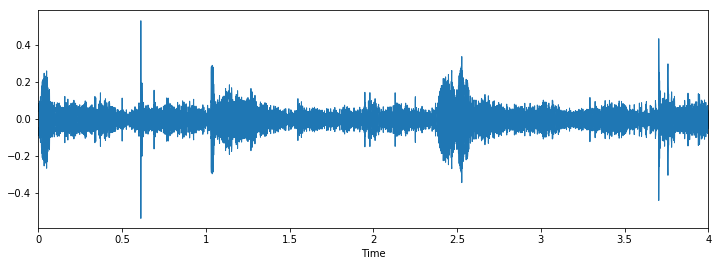

In [15]:
plt.figure(figsize =(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

In [18]:
train.index

RangeIndex(start=0, stop=5435, step=1)

In [24]:
import os

In [44]:
i = np.random.choice(train.index)
audio_name = train.ID[i]

In [45]:
x, sr = librosa.load('Train' + '/' + str(train.ID[i]) + '.wav')  

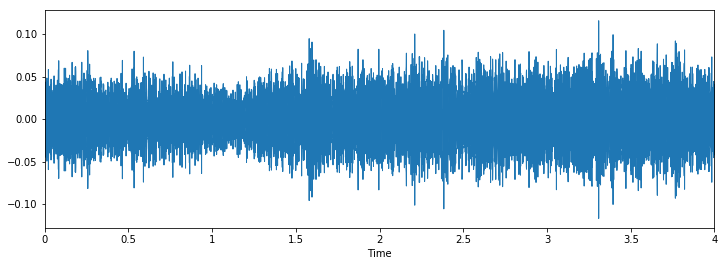

In [46]:
plt.figure(figsize = (12,4))
librosa.display.waveplot(x , sr = sr)

In [55]:
train['Class'].value_counts()/5435

jackhammer          0.122907
engine_idling       0.114811
siren               0.111684
dog_bark            0.110396
children_playing    0.110396
drilling            0.110396
street_music        0.110396
air_conditioner     0.110396
car_horn            0.056302
gun_shot            0.042318
Name: Class, dtype: float64

In [57]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file, res_type = 'kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate,n_mfcc = 40)
    mfccs_scaled =np.mean(mfccs.T,axis = 0)
    return mfccs_scaled
    

In [69]:
features = []
for i in range(train.shape[0]):
    filepath = 'Train' + '/' + str(train.ID[i]) + '.wav'
    class_label = train.Class[i]
    data = feature_extractor(filepath)
    features.append([data,class_label])
    

In [70]:
df = pd.DataFrame(features , columns = ['feature','class_label'])

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
le = LabelEncoder()

In [76]:
df['class_label'] = le.fit_transform(df['class_label'])

In [78]:
X = np.array(df.feature.tolist())
y = np.array(df.class_label.tolist())

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [82]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4348, 40) (1087, 40) (4348,) (1087,)
